# Why prefilter paired chain data?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

import pyrepseq as prs
import pyrepseq.plotting as pp

from lib import *

plt.style.use('tcrspace.mplstyle')

In [2]:
ratios = []
pc_raw = []
pc_corrected = []
for name in tannofiles[:9]:
    df = pd.read_csv(f'{data_directory}/tanno/{name}.txt', sep='\t')
    df = df.sort_values('Clustered', ascending=False)
    valid_light = df['CDRL3_AA'].apply(prs.isvalidcdr3)
    valid_heavy = df['CDRH3_AA'].apply(prs.isvalidcdr3)
    df = df[valid_light & valid_heavy]
    ratio = prs.pc(df['CDRL3_NT'])/prs.pc(df['CDRL3_AA'])
    pc_raw.append(prs.pc(df['CDRL3_AA']))
    df.drop_duplicates('CDRL3_NT', inplace=True)
    pc_corrected.append(prs.pc(df['CDRL3_AA']))
    ratios.append(ratio)

In [3]:
df = pd.read_csv(f'{data_directory}/post_sample_alpha.csv',
                 names=['amino_acid', 'v_gene', 'j_gene', 'nucleotide'])
ratio_expected = prs.pc(df['nucleotide'])/prs.pc(df['amino_acid'])

In [4]:
chain='alpha'
pc_data = []
for subject in ['W', 'M']:
    df_back = pd.read_csv(f'{data_directory}/minervina/{chain}/{subject}_F1_2018_{chain}.txt.gz',
                          sep='\t')
    df_back = df_back[df_back['aaSeqCDR3'].apply(prs.isvalidcdr3)]
    pc_data.append(prs.pc(df_back['aaSeqCDR3']))

In [5]:
colors = matplotlib.rcParams['axes.prop_cycle'].by_key()['color']

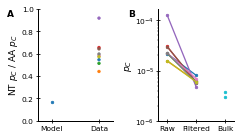

In [6]:
fig, axes = plt.subplots(figsize=(3.42, 2.0), ncols=2)
ax = axes[0]
ax.plot(['Model'], [ratio_expected], 'o')
ax.scatter(['Data']*len(ratios), ratios, color=colors[:len(ratios)])
ax.set_ylabel('NT $p_C$ / AA $p_C$')
ax.set_ylim(0, 1.0)
ax.set_xlim(-0.3, 1.3)
ax=axes[1]
pcs = np.array(list(zip(pc_raw, pc_corrected)))
for raw, corrected in pcs:
    ax.plot(['Raw', 'Filtered'], [raw, corrected], 'o-')
ax.plot(['Bulk']*len(pc_data), pc_data, 'o')
ax.set_ylabel('$p_C$')
ax.set_yscale('log')
ax.set_xlim(-0.3, 2.3)
ax.set_ylim(1e-6, 1.7e-4)
fig.tight_layout()
pp.label_axes(fig, xy=(-0.4, 1.0))
fig.savefig('figures/figureS3.svg')

Rationale for collapsing alpha chains paired with multiple beta chains in the paired chain data from Tanno. The ratio between nucleotide and amino acid coincidences probabilities for alpha chains is substantially higher than expected from models of VDJ recombination suggesting potential cross-contamination. Collapsing redundant alpha chains reduces variation in amino acid coincidence probabilities across samples and makes them more comparable to those found in bulk single chain datasets (subjects M and W at baseline from Minervina 2021).